In [ ]:
import os
import re
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"]="0";

In [ ]:
categories = ['alt.atheism', 'soc.religion.christian',
             'comp.graphics', 'sci.med']
from sklearn.datasets import fetch_20newsgroups
train_b = fetch_20newsgroups(subset='train',
   categories=categories, shuffle=True, random_state=42)
test_b = fetch_20newsgroups(subset='test',
   categories=categories, shuffle=True, random_state=42)

print('size of training set: %s' % (len(train_b['data'])))
print('size of validation set: %s' % (len(test_b['data'])))
print('classes: %s' % (train_b.target_names))

x_train = train_b.data
y_train = train_b.target
x_test = test_b.data
y_test = test_b.target

size of training set: 2257
size of validation set: 1502
classes: ['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']


In [ ]:
y_train

array([1, 1, 3, ..., 2, 2, 2])

In [ ]:
len(x_train),len(x_test)

(2257, 1502)

In [ ]:
import torch

if torch.cuda.is_available():       
    device = torch.device("cuda")
    print(f'There are {torch.cuda.device_count()} GPU(s) available.')
    print('Device name:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
Device name: Tesla T4


In [ ]:
! pip install ktrain

     |████████████████████████████████| 25.3MB 45.2MB/s 
     |████████████████████████████████| 6.8MB 39.6MB/s 
     |████████████████████████████████| 983kB 53.1MB/s 
     |████████████████████████████████| 266kB 60.6MB/s 
     |████████████████████████████████| 1.3MB 51.6MB/s 
     |████████████████████████████████| 1.2MB 43.9MB/s 
     |████████████████████████████████| 471kB 54.6MB/s 
     |████████████████████████████████| 2.9MB 52.9MB/s 
     |████████████████████████████████| 890kB 52.2MB/s 
  Created wheel for ktrain: filename=ktrain-0.25.4-cp36-none-any.whl size=25276443 sha256=be76359183d4031d01cc863cb62727b0367e590cc4a36a9d8470078b48f053dc
  Stored in directory: /root/.cache/pip/wheels/1b/77/8a/bdceaabc308e7178d575278bf6143b7d1a9b939a1e40c56b88
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993194 sha256=f73b18c9ab5cabfc84516e28fbc5d0a8912d12d05c2558e40ab8741312930d44
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d

In [ ]:
train_b.target_names

[autoreload of sklearn.base failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
ValueError: clone() requires a code object with 0 free vars, not 3
]
[autoreload of sklearn.utils failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
ImportError: cannot import name 'parse_version'
]
[autoreload of sklearn.utils.class_weight failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
ValueError: compute_class_weight() requires a code object with 0 free vars, not 3
]
[autoreload of sklearn.utils.validation failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/I

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [ ]:
import ktrain
from ktrain import text
MODEL_NAME = 'distilbert-base-uncased'
t = text.Transformer(MODEL_NAME, maxlen=500, class_names=train_b.target_names)
trn = t.preprocess_train(x_train, y_train)
val = t.preprocess_test(x_test, y_test)
model = t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=6)


preprocessing train...
language: en
train sequence lengths:
	mean : 308
	95percentile : 837
	99percentile : 1938


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 343
	95percentile : 979
	99percentile : 2562


simulating training for different learning rates... this may take a few moments...
Epoch 1/2
376/376 [==============================] - 150s 376ms/step - loss: 1.2561 - accuracy: 0.4070
Epoch 2/2
376/376 [==============================] - 113s 300ms/step - loss: 3096.0377 - accuracy: 0.2626


done.
Visually inspect loss plot and select learning rate associated with falling loss


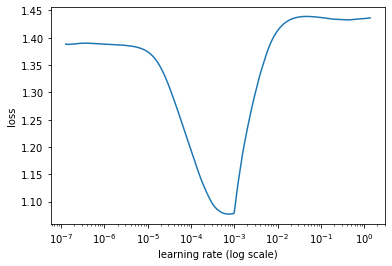

In [ ]:
learner.lr_find(show_plot=True, max_epochs=2)

In [ ]:
learner.fit_onecycle(1e-5, 4)



begin training using onecycle policy with max lr of 1e-05...
Epoch 1/4
377/377 [==============================] - 186s 476ms/step - loss: 1.2619 - accuracy: 0.4957 - val_loss: 0.4149 - val_accuracy: 0.9095
Epoch 2/4
377/377 [==============================] - 178s 471ms/step - loss: 0.2868 - accuracy: 0.9423 - val_loss: 0.1874 - val_accuracy: 0.9467
Epoch 3/4
377/377 [==============================] - 177s 470ms/step - loss: 0.0849 - accuracy: 0.9835 - val_loss: 0.1406 - val_accuracy: 0.9561
Epoch 4/4
377/377 [==============================] - 178s 470ms/step - loss: 0.0325 - accuracy: 0.9958 - val_loss: 0.1312 - val_accuracy: 0.9607


In [ ]:
learner.validate(class_names=t.get_classes())

                        precision    recall  f1-score   support

           alt.atheism       0.94      0.92      0.93       319
         comp.graphics       0.97      0.97      0.97       389
               sci.med       0.98      0.97      0.98       396
soc.religion.christian       0.95      0.98      0.96       398

              accuracy                           0.96      1502
             macro avg       0.96      0.96      0.96      1502
          weighted avg       0.96      0.96      0.96      1502



array([[292,   3,   6,  18],
       [ 11, 377,   1,   0],
       [  1,   7, 385,   3],
       [  6,   2,   1, 389]])

In [ ]:
# the one we got most wrong
learner.view_top_losses(n=1, preproc=t)

----------
id:813 | loss:5.69 | true:alt.atheism | pred:sci.med)



In [ ]:
# understandable mistake - this sci.med post talks a lot about computer graphics
print(x_test[813])

From: decay@cbnewsj.cb.att.com (dean.kaflowitz)
Subject: Re: some thoughts.
Organization: AT&T
Distribution: na
Lines: 10

In article <1993Apr26.000410.18114@daffy.cs.wisc.edu>, mccullou@snake2.cs.wisc.edu (Mark McCullough) writes:
> In article <C62B52.LKz@blaze.cs.jhu.edu> arromdee@jyusenkyou.cs.jhu.edu (Ken Arromdee) writes:
> >I can think of a lot more agonizing ways to get killed.  Fatal cancer, for
> >instance.
> >
> >Anyone else have some more?  Maybe we can make a list.
> How about dying of a blood clot in a _very_ bad place.

Kidney stones with complete blockage.




In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc=t)

In [ ]:
predictor.predict("""I need some ECG data , uncompressed,  hopefully in ascii format.
Don't care what it looks like, this is for a signal processing
project.""")

'comp.graphics'

In [ ]:
predictor.predict('Jesus Christ is the central figure of Christianity.')

'soc.religion.christian'

In [ ]:
! pip install git+https://github.com/amaiya/eli5@tfkeras_0_10_1

  Cloning https://github.com/amaiya/eli5 (to revision tfkeras_0_10_1) to /tmp/pip-req-build-vkyxu5x4
  Running command git clone -q https://github.com/amaiya/eli5 /tmp/pip-req-build-vkyxu5x4
  Running command git checkout -b tfkeras_0_10_1 --track origin/tfkeras_0_10_1
  Switched to a new branch 'tfkeras_0_10_1'
  Branch 'tfkeras_0_10_1' set up to track remote branch 'tfkeras_0_10_1' from 'origin'.
  Created wheel for eli5: filename=eli5-0.10.1-py2.py3-none-any.whl size=106832 sha256=e1e49b0c4f170f526cd25227b667374b7888d7891c8291eeefd5fa2d07955d6b
  Stored in directory: /tmp/pip-ephem-wheel-cache-9e20dbc5/wheels/51/59/0a/0f48442b8d209583a4453580938d7ba2270aca40edacee6d45
Successfully built eli5


In [ ]:
predictor.explain('Jesus Christ is the central figure of Christianity.')

TypeError: ignored

In [ ]:
pwd

In [ ]:
predictor.save('/my_20newsgroup_predictor')

In [ ]:
import ktrain
reloaded_predictor = ktrain.load_predictor('/my_20newsgroup_predictor')

In [ ]:
reloaded_predictor.predict('Jesus Christ is the central figure of Christianity.')

'soc.religion.christian'

In [ ]:
reloaded_predictor.predict_proba('Jesus Christ is the central figure of Christianity.')

array([0.01855068, 0.01086477, 0.01486581, 0.95571876], dtype=float32)

In [ ]:
reloaded_predictor.get_classes()

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [ ]:
# Download data
import requests
request = requests.get("https://drive.google.com/uc?export=download&id=1wHt8PsMLsfX5yNSqrt2fSTcb8LEiclcf")
with open("data.zip", "wb") as file:
    file.write(request.content)

# Unzip data
import zipfile
with zipfile.ZipFile('data.zip') as zip:
    zip.extractall('data')

In [ ]:
 # Load data and set labels
data_complaint = pd.read_csv('data/complaint1700.csv')
data_complaint['label'] = 0
data_non_complaint = pd.read_csv('data/noncomplaint1700.csv')
data_non_complaint['label'] = 1

# Concatenate complaining and non-complaining data
data = pd.concat([data_complaint, data_non_complaint], axis=0).reset_index(drop=True)

data.head()

,id,airline,tweet,label
0,80938,United,@united I'm having issues. Yesterday I rebooke...,0
1,10959,United,@united kinda feel like the $6.99 you charge f...,0
2,130813,SouthWest,"Livid in Vegas, delayed, again&amp; again&amp;...",0
3,146589,United,@united the most annoying man on earth is on m...,0
4,117579,United,"@united The last 2 weeks I've flown wit u, you...",0


In [ ]:
# Drop 'airline' column
data.drop(['airline'], inplace=True, axis=1)

# Display 5 random samples
data.sample(5)

,id,tweet,label
1721,2354,@AmericanAir going to miss the Mad Dogs!,1
1175,173280,@AmericanAir you always make my day with your ...,0
1272,121820,"terrible, terrible staff. missed our flight be...",0
344,168913,"Hey @AmericanAir, It's too late to be stuck on...",0
2251,47079,Holy fast speed @AmericanAir! inflight #WifiOn...,1


In [ ]:
from sklearn.model_selection import train_test_split

X = data.tweet.values
y = data.label.values

X_train, X_val, y_train, y_val =\
    train_test_split(X, y, test_size=0.1, random_state=2020)

In [ ]:
X_train = [x for x in X_train]
X_val = [x for x in X_val]

In [ ]:
# Load test data
test_data = pd.read_csv('data/test_data.csv')

# Keep important columns
test_data = test_data[['id', 'tweet']]

# Display 5 samples from the test data
test_data.sample(5)

,id,tweet
1316,51432,@AsterAddis @AirCanada @united poor Sheba! So ...
3200,120820,"@AmericanAir hey guys, flight 202 to Boston he..."
3300,124995,@united not staffed to deal w problems. Not tr...
2081,80382,@JeromeASF @united noo that sucks
3433,129827,@AmericanAir yeah AUS is where I'm headed to b...


In [ ]:
import ktrain
from ktrain import text
MODEL_NAME = 'distilbert-base-uncased'
t = text.Transformer(MODEL_NAME, maxlen=500, class_names=['0','1'])
trn = t.preprocess_train(X_train, y_train)
val = t.preprocess_test(X_val, y_val)
model = t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=10)

preprocessing train...
language: en
train sequence lengths:
	mean : 18
	95percentile : 26
	99percentile : 28


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 18
	95percentile : 27
	99percentile : 28


simulating training for different learning rates... this may take a few moments...
Epoch 1/4
306/306 [==============================] - 191s 600ms/step - loss: 0.6908 - accuracy: 0.5205
Epoch 2/4
306/306 [==============================] - 184s 598ms/step - loss: 0.5806 - accuracy: 0.7039
Epoch 3/4
306/306 [==============================] - 182s 592ms/step - loss: 0.8840 - accuracy: 0.4886
Epoch 4/4
306/306 [==============================] - 180s 587ms/step - loss: 0.7420 - accuracy: 0.4820


done.
Visually inspect loss plot and select learning rate associated with falling loss


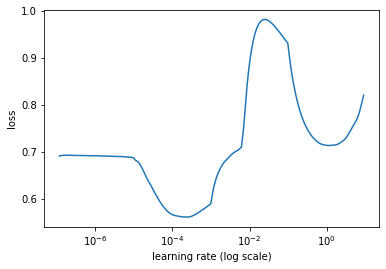

In [ ]:
learner.lr_find(show_plot=True, max_epochs=4)

In [ ]:
learner.fit_onecycle(8e-5, 4)

In [ ]:
import torch

if torch.cuda.is_available():       
    device = torch.device("cuda")
    print(f'There are {torch.cuda.device_count()} GPU(s) available.')
    print('Device name:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

In [ ]:
import nltk
# Uncomment to download "stopwords"
nltk.download("stopwords")
from nltk.corpus import stopwords

def text_preprocessing(s):
    """
    - Lowercase the sentence
    - Change "'t" to "not"
    - Remove "@name"
    - Isolate and remove punctuations except "?"
    - Remove other special characters
    - Remove stop words except "not" and "can"
    - Remove trailing whitespace
    """
    s = s.lower()
    # Change 't to 'not'
    s = re.sub(r"\'t", " not", s)
    # Remove @name
    s = re.sub(r'(@.*?)[\s]', ' ', s)
    # Isolate and remove punctuations except '?'
    s = re.sub(r'([\'\"\.\(\)\!\?\\\/\,])', r' \1 ', s)
    s = re.sub(r'[^\w\s\?]', ' ', s)
    # Remove some special characters
    s = re.sub(r'([\;\:\|•«\n])', ' ', s)
    # Remove stopwords except 'not' and 'can'
    s = " ".join([word for word in s.split()
                  if word not in stopwords.words('english')
                  or word in ['not', 'can']])
    # Remove trailing whitespace
    s = re.sub(r'\s+', ' ', s).strip()
    
    return s

In [ ]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer

# Preprocess text
X_train_preprocessed = np.array([text_preprocessing(text) for text in X_train])
X_val_preprocessed = np.array([text_preprocessing(text) for text in X_val])

# Calculate TF-IDF
tf_idf = TfidfVectorizer(ngram_range=(1, 3),
                         binary=True,
                         smooth_idf=False)
X_train_tfidf = tf_idf.fit_transform(X_train_preprocessed)
X_val_tfidf = tf_idf.transform(X_val_preprocessed)

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

def get_auc_CV(model):
    """
    Return the average AUC score from cross-validation.
    """
    # Set KFold to shuffle data before the split
    kf = StratifiedKFold(5, shuffle=True, random_state=1)

    # Get AUC scores
    auc = cross_val_score(
        model, X_train_tfidf, y_train, scoring="roc_auc", cv=kf)

    return auc.mean()

In [ ]:
from sklearn.naive_bayes import MultinomialNB

res = pd.Series([get_auc_CV(MultinomialNB(i))
                 for i in np.arange(1, 10, 0.1)],
                index=np.arange(1, 10, 0.1))

best_alpha = np.round(res.idxmax(), 2)
print('Best alpha: ', best_alpha)

plt.plot(res)
plt.title('AUC vs. Alpha')
plt.xlabel('Alpha')
plt.ylabel('AUC')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, roc_curve, auc

def evaluate_roc(probs, y_true):
    """
    - Print AUC and accuracy on the test set
    - Plot ROC
    @params    probs (np.array): an array of predicted probabilities with shape (len(y_true), 2)
    @params    y_true (np.array): an array of the true values with shape (len(y_true),)
    """
    preds = probs[:, 1]
    fpr, tpr, threshold = roc_curve(y_true, preds)
    roc_auc = auc(fpr, tpr)
    print(f'AUC: {roc_auc:.4f}')
       
    # Get accuracy over the test set
    y_pred = np.where(preds >= 0.5, 1, 0)
    accuracy = accuracy_score(y_true, y_pred)
    print(f'Accuracy: {accuracy*100:.2f}%')
    
    # Plot ROC AUC
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [ ]:
# Compute predicted probabilities
nb_model = MultinomialNB(alpha=1.8)
nb_model.fit(X_train_tfidf, y_train)
probs = nb_model.predict_proba(X_val_tfidf)

# Evaluate the classifier
evaluate_roc(probs, y_val)

In [ ]:
!pip install transformers

In [ ]:
def text_preprocessing(text):
    """
    - Remove entity mentions (eg. '@united')
    - Correct errors (eg. '&amp;' to '&')
    @param    text (str): a string to be processed.
    @return   text (Str): the processed string.
    """
    # Remove '@name'
    text = re.sub(r'(@.*?)[\s]', ' ', text)

    # Replace '&amp;' with '&'
    text = re.sub(r'&amp;', '&', text)

    # Remove trailing whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [ ]:
# Print sentence 0
print('Original: ', X[0])
print('Processed: ', text_preprocessing(X[0]))

In [ ]:
from transformers import BertTokenizer

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

# Create a function to tokenize a set of texts
def preprocessing_for_bert(data):
    """Perform required preprocessing steps for pretrained BERT.
    @param    data (np.array): Array of texts to be processed.
    @return   input_ids (torch.Tensor): Tensor of token ids to be fed to a model.
    @return   attention_masks (torch.Tensor): Tensor of indices specifying which
                  tokens should be attended to by the model.
    """
    # Create empty lists to store outputs
    input_ids = []
    attention_masks = []

    # For every sentence...
    for sent in data:
        # `encode_plus` will:
        #    (1) Tokenize the sentence
        #    (2) Add the `[CLS]` and `[SEP]` token to the start and end
        #    (3) Truncate/Pad sentence to max length
        #    (4) Map tokens to their IDs
        #    (5) Create attention mask
        #    (6) Return a dictionary of outputs
        encoded_sent = tokenizer.encode_plus(
            text=text_preprocessing(sent),  # Preprocess sentence
            add_special_tokens=True,        # Add `[CLS]` and `[SEP]`
            max_length=MAX_LEN,                  # Max length to truncate/pad
            pad_to_max_length=True,         # Pad sentence to max length
            #return_tensors='pt',           # Return PyTorch tensor
            return_attention_mask=True      # Return attention mask
            )
        
        # Add the outputs to the lists
        input_ids.append(encoded_sent.get('input_ids'))
        attention_masks.append(encoded_sent.get('attention_mask'))

    # Convert lists to tensors
    input_ids = torch.tensor(input_ids)
    attention_masks = torch.tensor(attention_masks)

    return input_ids, attention_masks

In [ ]:
# Concatenate train data and test data
all_tweets = np.concatenate([data.tweet.values, test_data.tweet.values])

# Encode our concatenated data
encoded_tweets = [tokenizer.encode(sent, add_special_tokens=True) for sent in all_tweets]

# Find the maximum length
max_len = max([len(sent) for sent in encoded_tweets])
print('Max length: ', max_len)

In [ ]:
# Specify `MAX_LEN`
MAX_LEN = 64

# Print sentence 0 and its encoded token ids
token_ids = list(preprocessing_for_bert([X[0]])[0].squeeze().numpy())
print('Original: ', X[0])
print('Token IDs: ', token_ids)

# Run function `preprocessing_for_bert` on the train set and the validation set
print('Tokenizing data...')
train_inputs, train_masks = preprocessing_for_bert(X_train)
val_inputs, val_masks = preprocessing_for_bert(X_val)